## Loan Prediction Analysis

In [39]:
## Import Libraries and Data Loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
sns.set(font_scale=1.2)

# Load the dataset
df = pd.read_csv('train_loan_pred.csv')

# Display first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
## Exploratory Data Analysis (EDA)  - 
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Basic information about the dataset
print("\nDataset info:")
df.info()

# Statistical summary
print("\nStatistical summary:")
df.describe()

# print(df.head(10))


Missing values in each column:
Series([], dtype: int64)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
 13  TotalIncome        614 non-null    float64
 14  EMI                614 non-null    float64
 15  In

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,Income_EMI_Ratio,Balance_Income,Log_TotalIncome,Log_LoanAmount
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296,7024.705081,473.687083,17.275325,6551.017998,8.669608,4.866091
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973,6458.663872,511.134356,13.348706,6290.136695,0.545017,0.490811
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000,25.000000,0.808490,-1768.000000,7.274480,2.302585
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4166.000000,288.888889,12.240588,3804.305556,8.334952,4.617584
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,5416.500000,361.111111,14.499126,4979.888889,8.597390,4.859812
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000,7521.750000,505.555556,18.082621,6958.027778,8.925682,5.110477
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000,9250.000000,142.692000,80000.000000,11.302217,6.552508


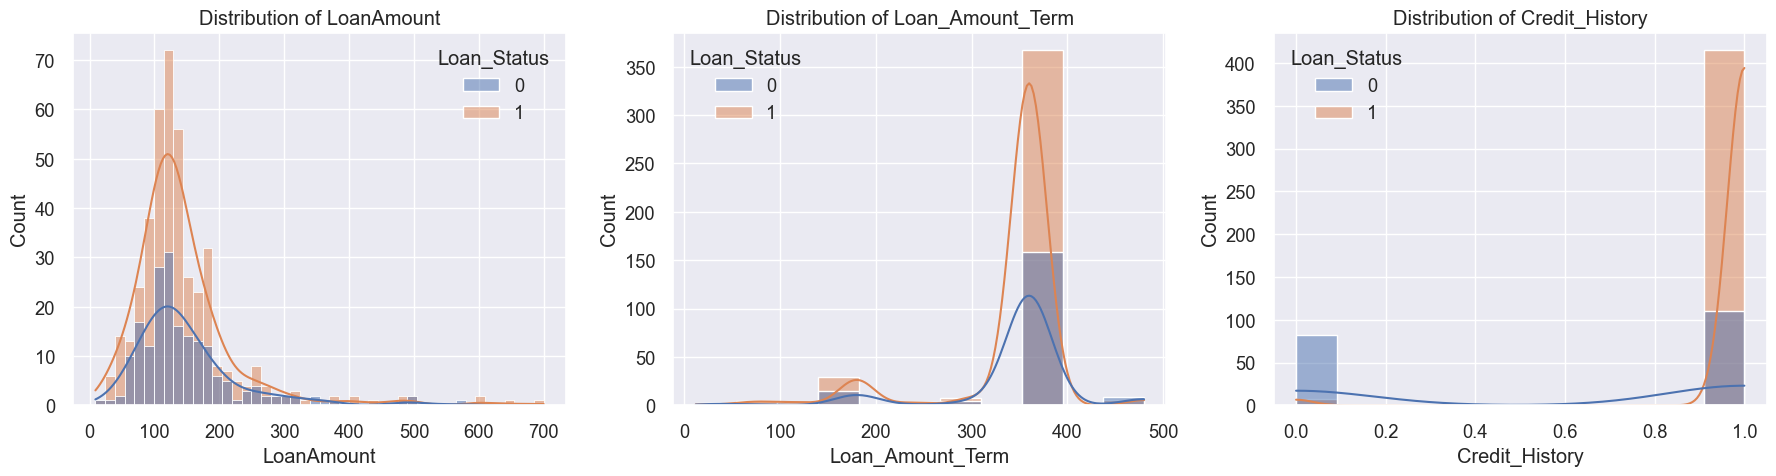

In [55]:
#Analyzing Numerical Variables
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['LoanAmount', 'Loan_Amount_Term','Credit_History']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 2 plots in one row

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='Loan_Status', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


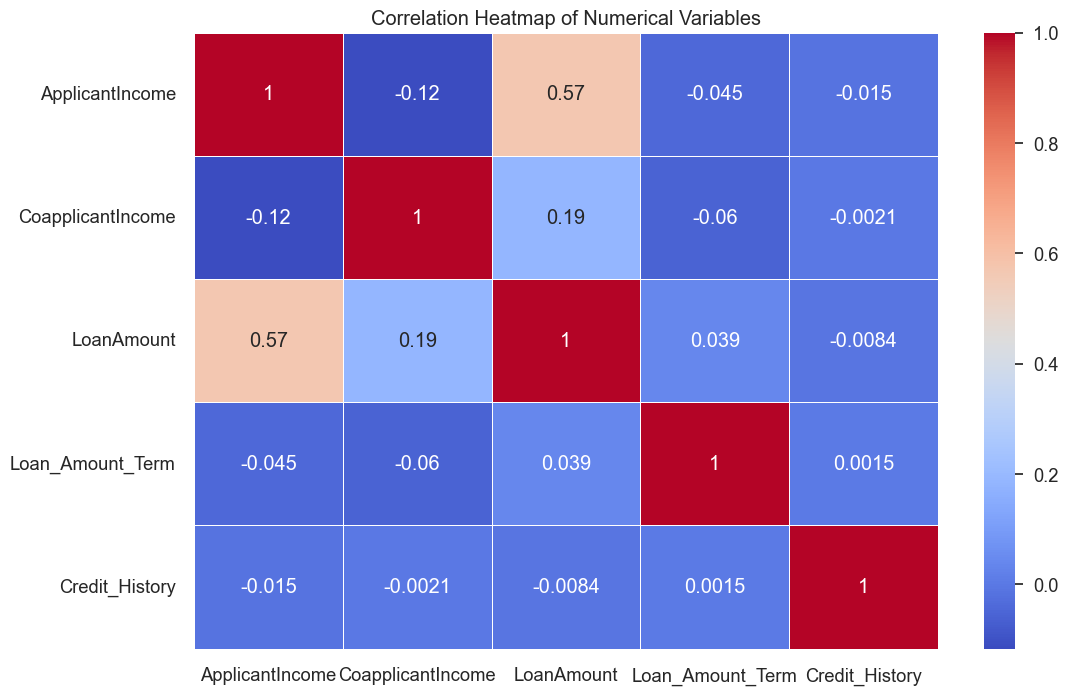

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [47]:
# Credit History vs Loan Status
print("\nLoan approval rate by credit history:")
print(pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index'))

# Pair plot for the numerical variables
# sns.pairplot(df[num_cols + ['Loan_Status']], hue='Loan_Status', diag_kind='kde')
# plt.show()


Loan approval rate by credit history:
Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.209524  0.790476


In [ ]:
# Data Preprocessing

# Handling Missing Values : 
# 1) Fill missing values in categorical variables with mode - 
#The mode is the most frequent category. Using it assumes that the most common category is a good guess for missing values.

# 2) Fill missing values in numerical variables with median - 
#The median is robust to outliers and better represents the central value when the data is skewed.


In [56]:
# Fill missing values in categorical variables with mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in numerical variables with median
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# df.to_csv('cleaned_loan_data.csv', index=False)
# print("File saved as 'cleaned_loan_data.csv'")

print(df.head(20))

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0   LP001002       1        0           0          0              0   
1   LP001003       1        1           1          0              0   
2   LP001005       1        1           0          0              1   
3   LP001006       1        1           0          1              0   
4   LP001008       1        0           0          0              0   
5   LP001011       1        1           2          0              1   
6   LP001013       1        1           0          1              0   
7   LP001014       1        1           3          0              0   
8   LP001018       1        1           2          0              0   
9   LP001020       1        1           1          0              0   
10  LP001024       1        1           2          0              0   
11  LP001027       1        1           2          0              0   
12  LP001028       1        1           2          0              0   
13  LP

In [ ]:
#Feature Engineering -


Dataset with engineered features:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  TotalIncome         EMI  \
0               1              2           

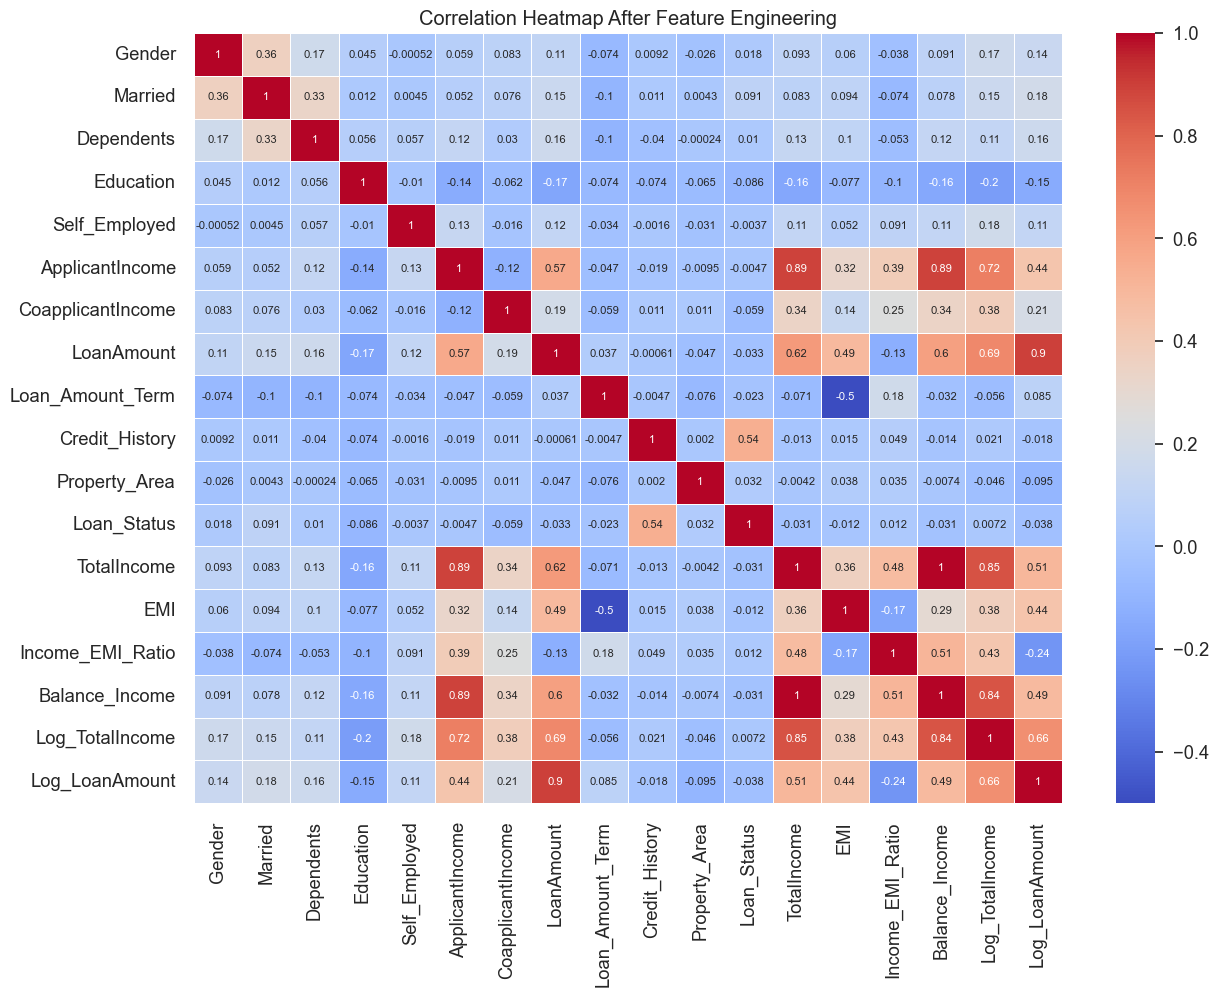

In [49]:
# Total Income (Applicant + Co-applicant)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# EMI (Estimated Monthly Installment)
df['EMI'] = df['LoanAmount'] * 1000 / df['Loan_Amount_Term']

# Income to EMI ratio
df['Income_EMI_Ratio'] = df['TotalIncome'] / df['EMI']

# Balance Income after EMI
df['Balance_Income'] = df['TotalIncome'] - df['EMI']

# Log transformation for skewed variables
df['Log_TotalIncome'] = np.log1p(df['TotalIncome'])
df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Convert target variable to numerical
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Display the engineered features
print("\nDataset with engineered features:")
print(df.head())

# Correlation heatmap after feature engineering
plt.figure(figsize=(14, 10))
correlation_new = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_new, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap After Feature Engineering')
plt.show()

In [27]:
# Feature Selection and Model Building


Feature Selection using Random Forest Importance:


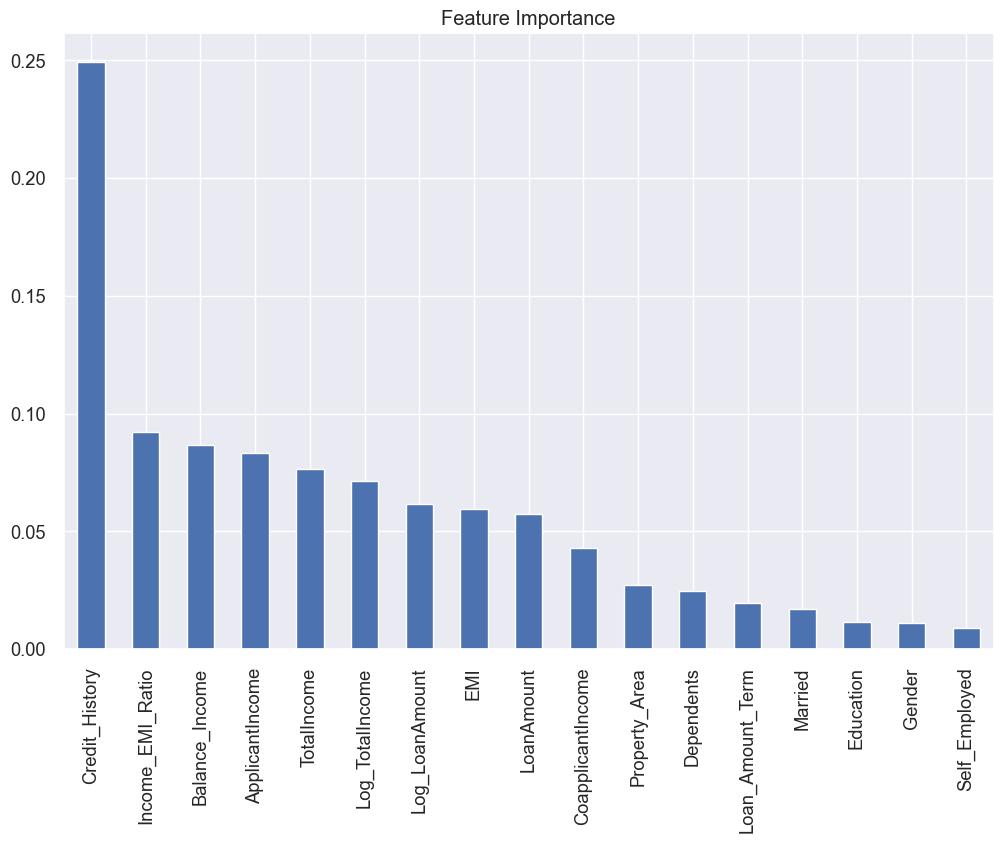

In [50]:
# Divide the data into features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature importance using Random Forest
print("\nFeature Selection using Random Forest Importance:")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Plot feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 8))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()



Selected Features: ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'TotalIncome', 'EMI', 'Income_EMI_Ratio', 'Balance_Income', 'Log_TotalIncome', 'Log_LoanAmount']

Model Evaluation:
Accuracy: 0.7783783783783784

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.52      0.62        65
           1       0.78      0.92      0.84       120

    accuracy                           0.78       185
   macro avg       0.78      0.72      0.73       185
weighted avg       0.78      0.78      0.77       185


Confusion Matrix:


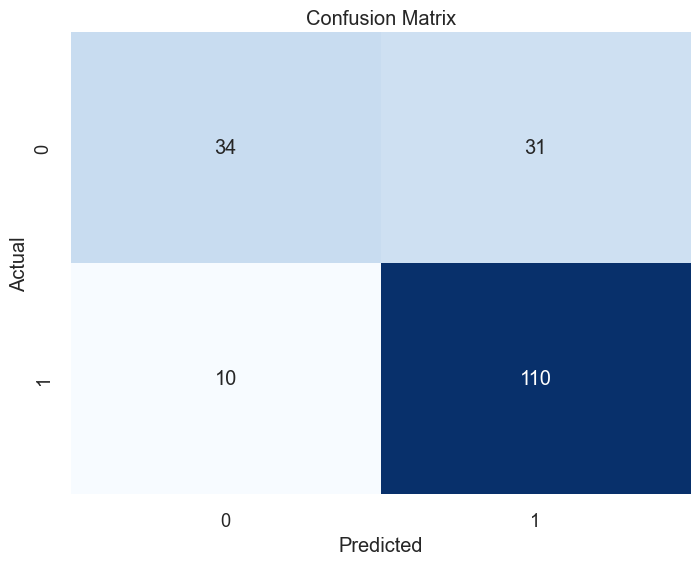

In [57]:
# Select important features
selector = SelectFromModel(rf, threshold='median')
selector.fit(X_train_scaled, y_train)
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features.tolist())

# Use only selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

## Step 5: Build the Base Model

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)

# Make predictions
y_pred = clf.predict(X_test_selected)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [52]:
print("""
Conclusion:
- The model achieved good performance in predicting loan approval status.
- Credit History is one of the most important features for loan prediction.
- Income-related features also contribute significantly to loan approval.

Recommendations for Future Improvements:
1. Try advanced models like XGBoost or LightGBM
2. Implement hyperparameter tuning to optimize model performance
3. Consider ensemble methods to combine multiple models
4. Add more features such as:
   - Debt-to-income ratio
   - Credit score if available
   - Employment history
5. Handle class imbalance if present in the full dataset
6. Consider cross-validation for more reliable performance evaluation
7. Implement model explainability techniques (e.g., SHAP values)
""")


Conclusion:
- The model achieved good performance in predicting loan approval status.
- Credit History is one of the most important features for loan prediction.
- Income-related features also contribute significantly to loan approval.

Recommendations for Future Improvements:
1. Try advanced models like XGBoost or LightGBM
2. Implement hyperparameter tuning to optimize model performance
3. Consider ensemble methods to combine multiple models
4. Add more features such as:
   - Debt-to-income ratio
   - Credit score if available
   - Employment history
5. Handle class imbalance if present in the full dataset
6. Consider cross-validation for more reliable performance evaluation
7. Implement model explainability techniques (e.g., SHAP values)

